In [14]:
cd(@__DIR__)
include(raw"utils\utils.jl")

Undrift!

Making a calendar of 100 years

In [15]:
try 
    using Dates
catch ; 
    import Pkg
    Pkg.add("Dates")
    using Dates
end
k=100
DatesRange=collect(Date(1900):Day(1):Date(1900+k))
N=length(DatesRange)

36525

# AR model on the whole series

## AR(1)

In [16]:
x0=-3.
Φ,σ=0.6,6

(0.6, 6)

In [17]:
include("utils/Simulation.jl")
x=[x0 ; simulation(x0,Φ,σ,N-length(x0))]

36525-element Vector{Float64}:
  -3.0
  11.357184582061631
   7.010736200048268
  11.517770738652127
  12.43122386125624
  -0.48925642073488884
  -4.65151188268817
   2.3206111377244674
  10.444863338379209
   7.598420044494097
   ⋮
   7.460387835752995
   9.66268343584482
  13.645754673018475
   8.545088571663275
   4.715811928139033
   7.0175151560159685
   0.5987549281549605
 -12.40590008758463
  -6.7767744238941034

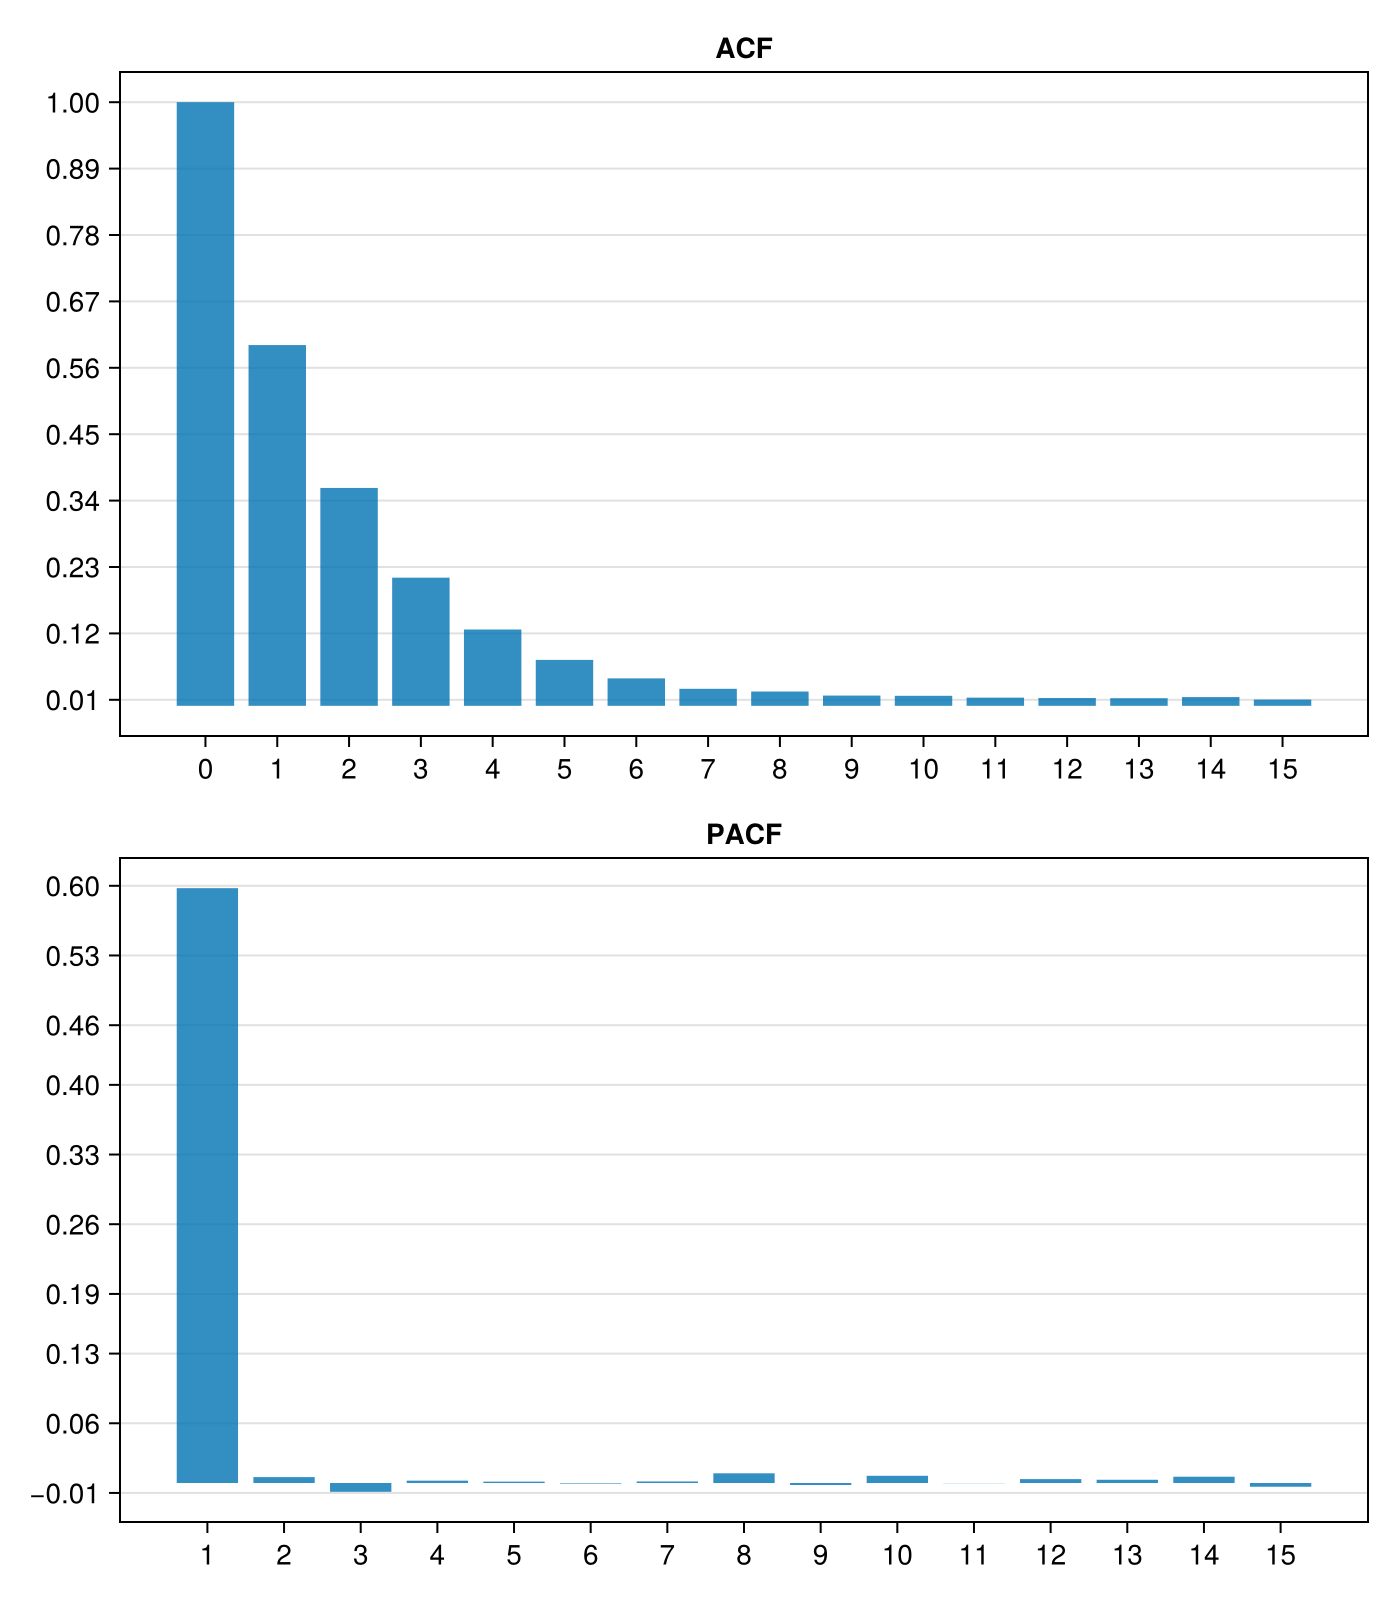

In [18]:
include("utils/ACF_PACF.jl")
ACF_PACF(x)

In [19]:
include("utils/Estimation.jl")
Parameters_est=LL_AR_Estimation(x,1)
Φ_hat,  σ_hat=Parameters_est[1][1], Parameters_est[2]
table = DataFrame("Parameters"=>"Φ", "Error"=>abs(Φ_hat-Φ), "Percentage error"=>100*abs(Φ_hat-Φ)/abs(Φ))
push!(table,("σ",abs(σ_hat-σ),100*abs(σ_hat-σ)/abs(σ)))

Row,Parameters,Error,Percentage error
,String,Float64,Float64
1,Φ,0.00235546,0.392576
2,σ,0.00610659,0.101777


# AR model on each month

Parameters for each month

In [20]:
Φ_month=[5,-7,2,7,-2,7,-5,6,3,1,4,-2] / 10
σ_month=[1.5,2,4.5,7,8,3,4.5,1,7,2.5,3,6]

12-element Vector{Float64}:
 1.5
 2.0
 4.5
 7.0
 8.0
 3.0
 4.5
 1.0
 7.0
 2.5
 3.0
 6.0

Generation of the series associated

In [21]:
n_month=200
x=SimulateMonth(4.,Date(2000,11,1),Φ_month,σ_month,n_month)
Date_vec=collect(Date(2000,11,1):(Date(2000,11,1) + Month(n_month) - Day(1)))
Monthly_temp=MonthlySeparateX(x,Date_vec)

12-element Vector{Vector{AbstractVector}}:
 [[-2.6548679993156687, -0.5854681521524161, 2.317542657081738, 0.3252276006648689, 0.5390102906706722, -0.25930748446425744, 1.1653072729785645, -0.6611116945826514, 0.8966555217492604, 2.827679231911205  …  -0.745751850525425, -1.356943941170755, -0.4398338430889969, -2.1589717632205896, 0.2597167188769909, -1.1280099491103164, -0.3917380764996856, -1.303876707187185, 0.7559380802470952, 0.8305253225651174], [0.9172115296770567, -0.052439769607750986, -1.082412180670438, -2.010391139018218, 0.28849346214449634, 0.08464110705080431, 0.5409788683961196, 0.4544806940831534, 0.48893997614984874, -0.8964031969830406  …  -1.8675381733134389, -1.2128278492778914, 1.1464395367856226, 1.6063857470860259, -1.0701648304007618, 1.0626893295086877, 0.21013256586339002, 2.1429090790035685, 3.0924623400638254, -0.33053929922847036], [2.1953236556486635, 1.3004413858231074, 0.26614849111606576, 0.07553507550502556, -1.1257421529543508, -0.23632194972923493,

## Autocorrelations

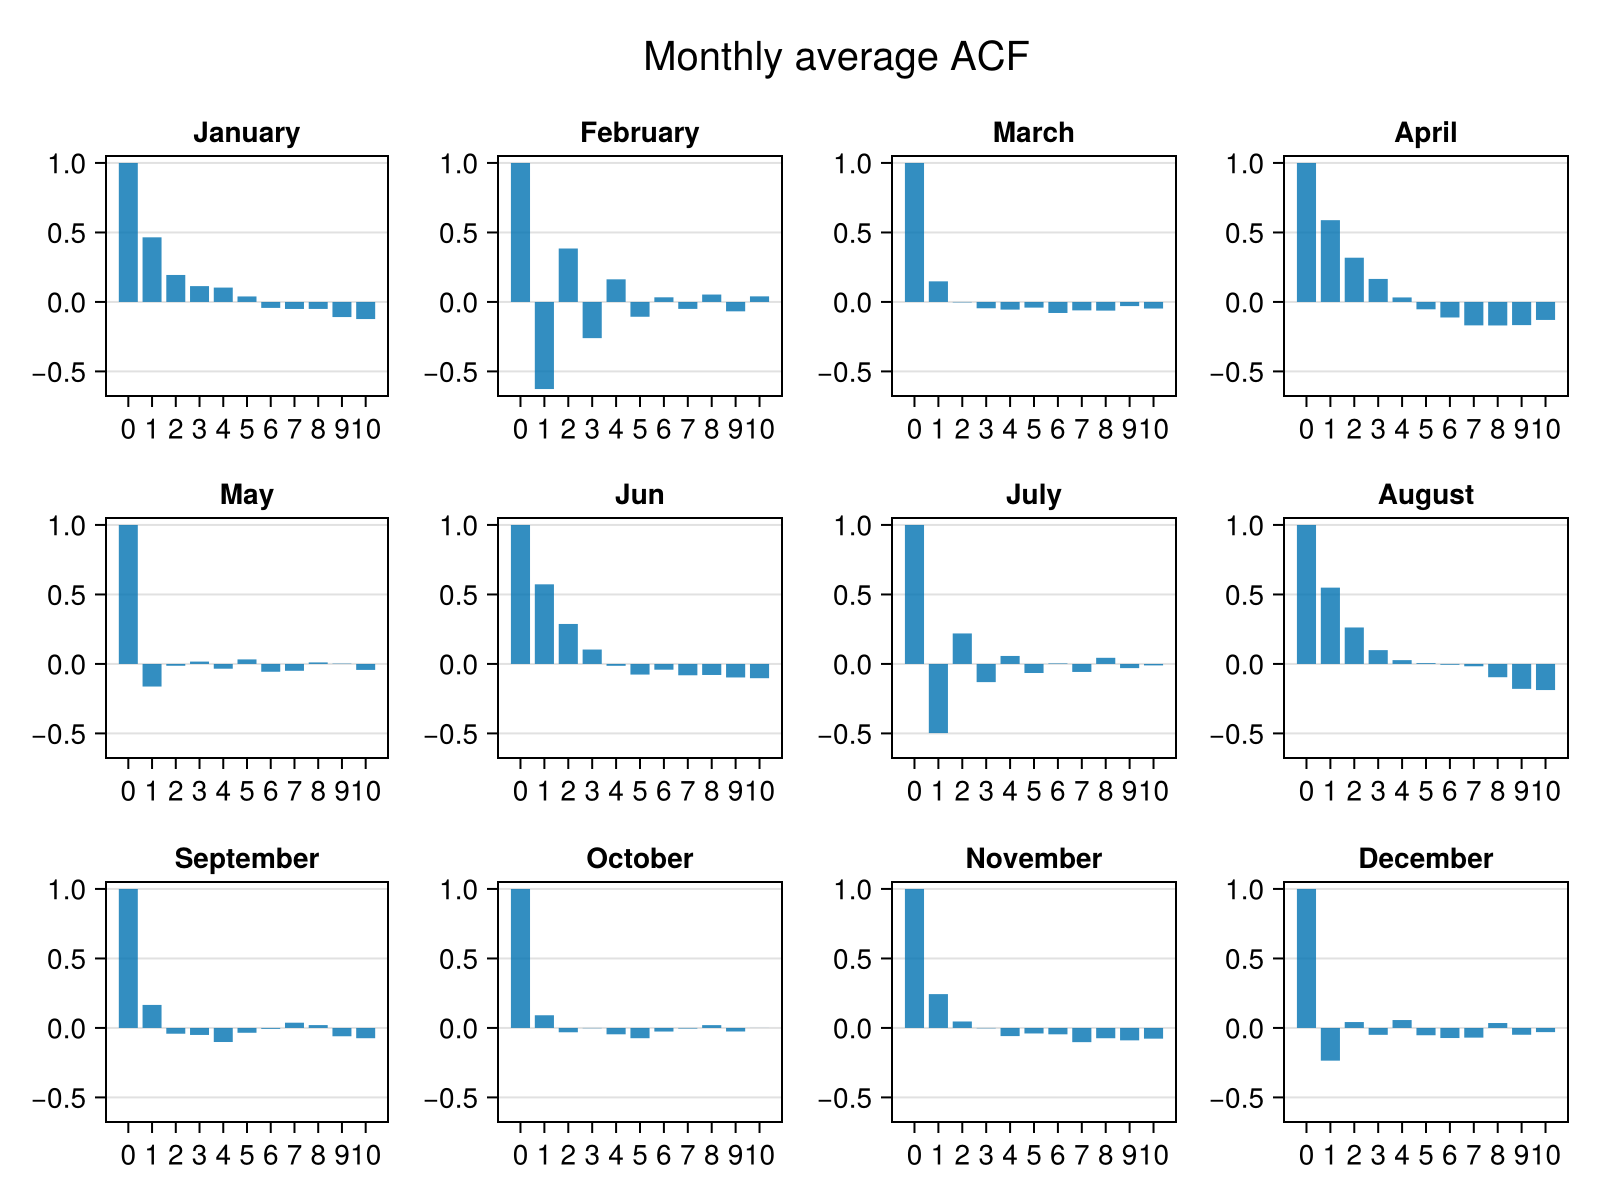

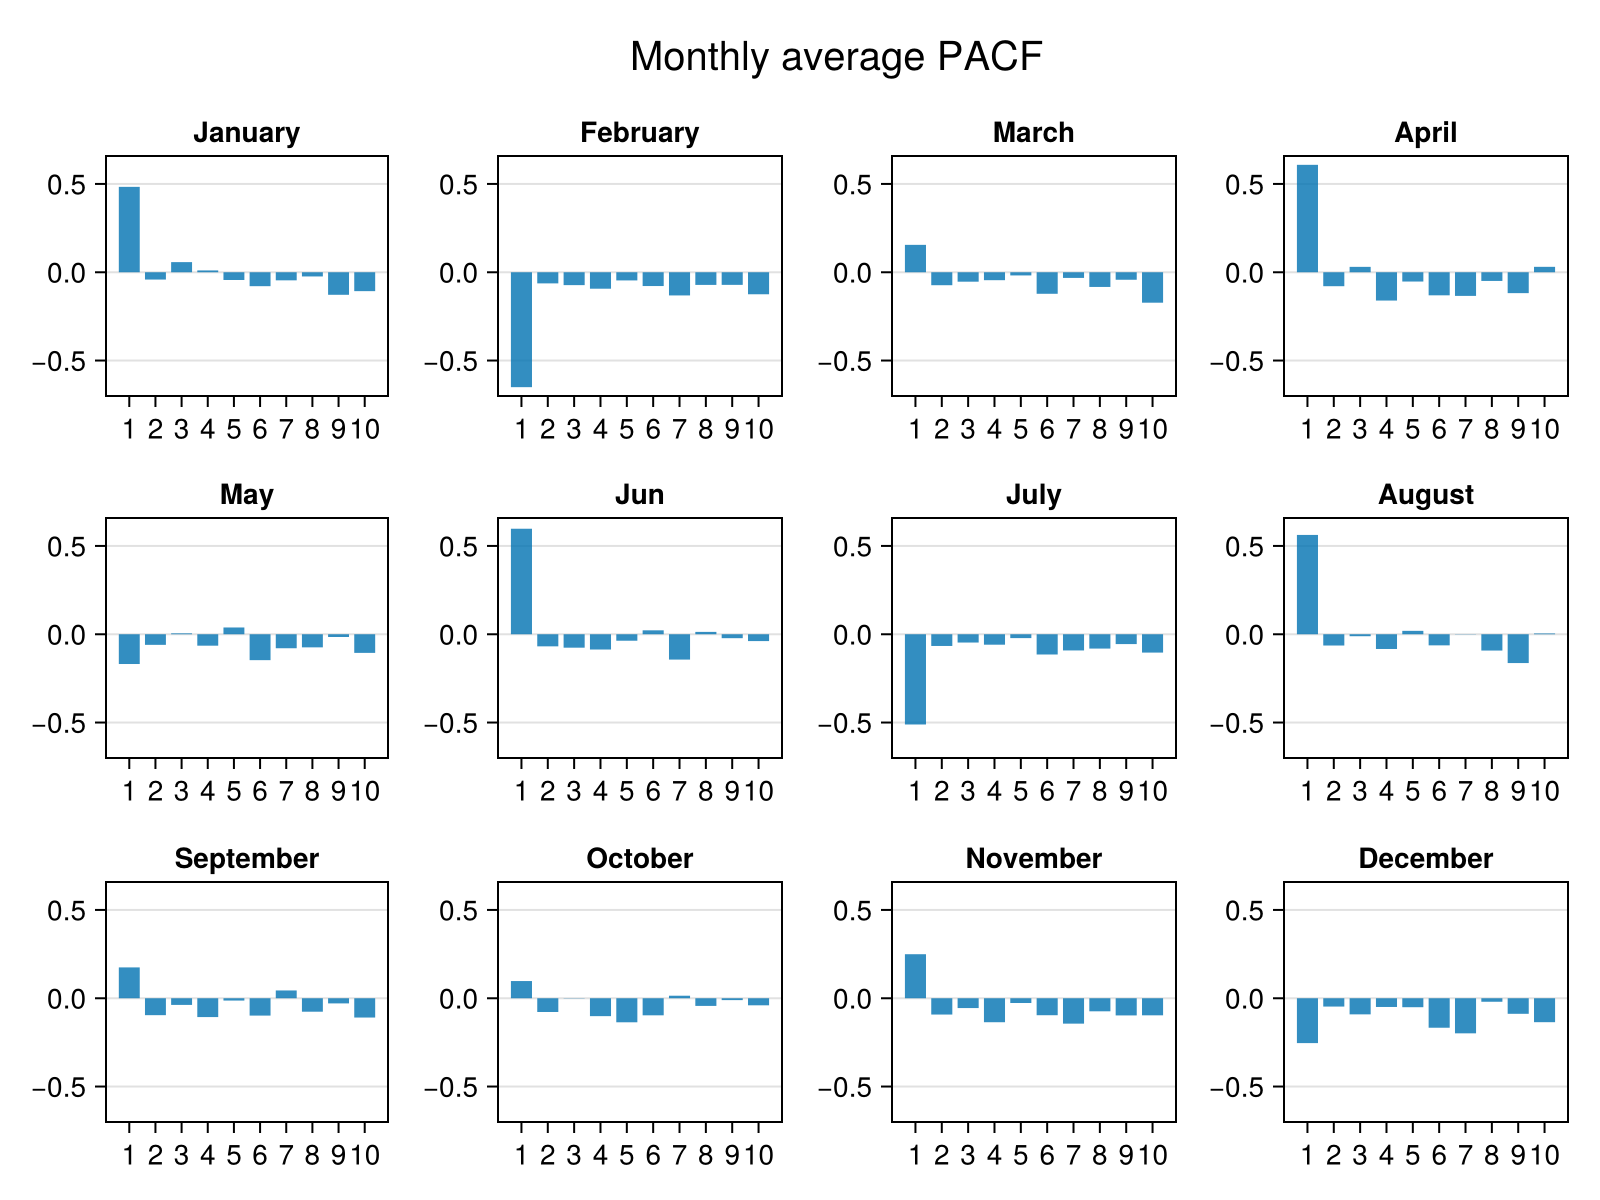

CairoMakie.Screen{IMAGE}


In [22]:
display(MonthlyACF(Monthly_temp))
display(MonthlyPACF(Monthly_temp))

## Estimating models

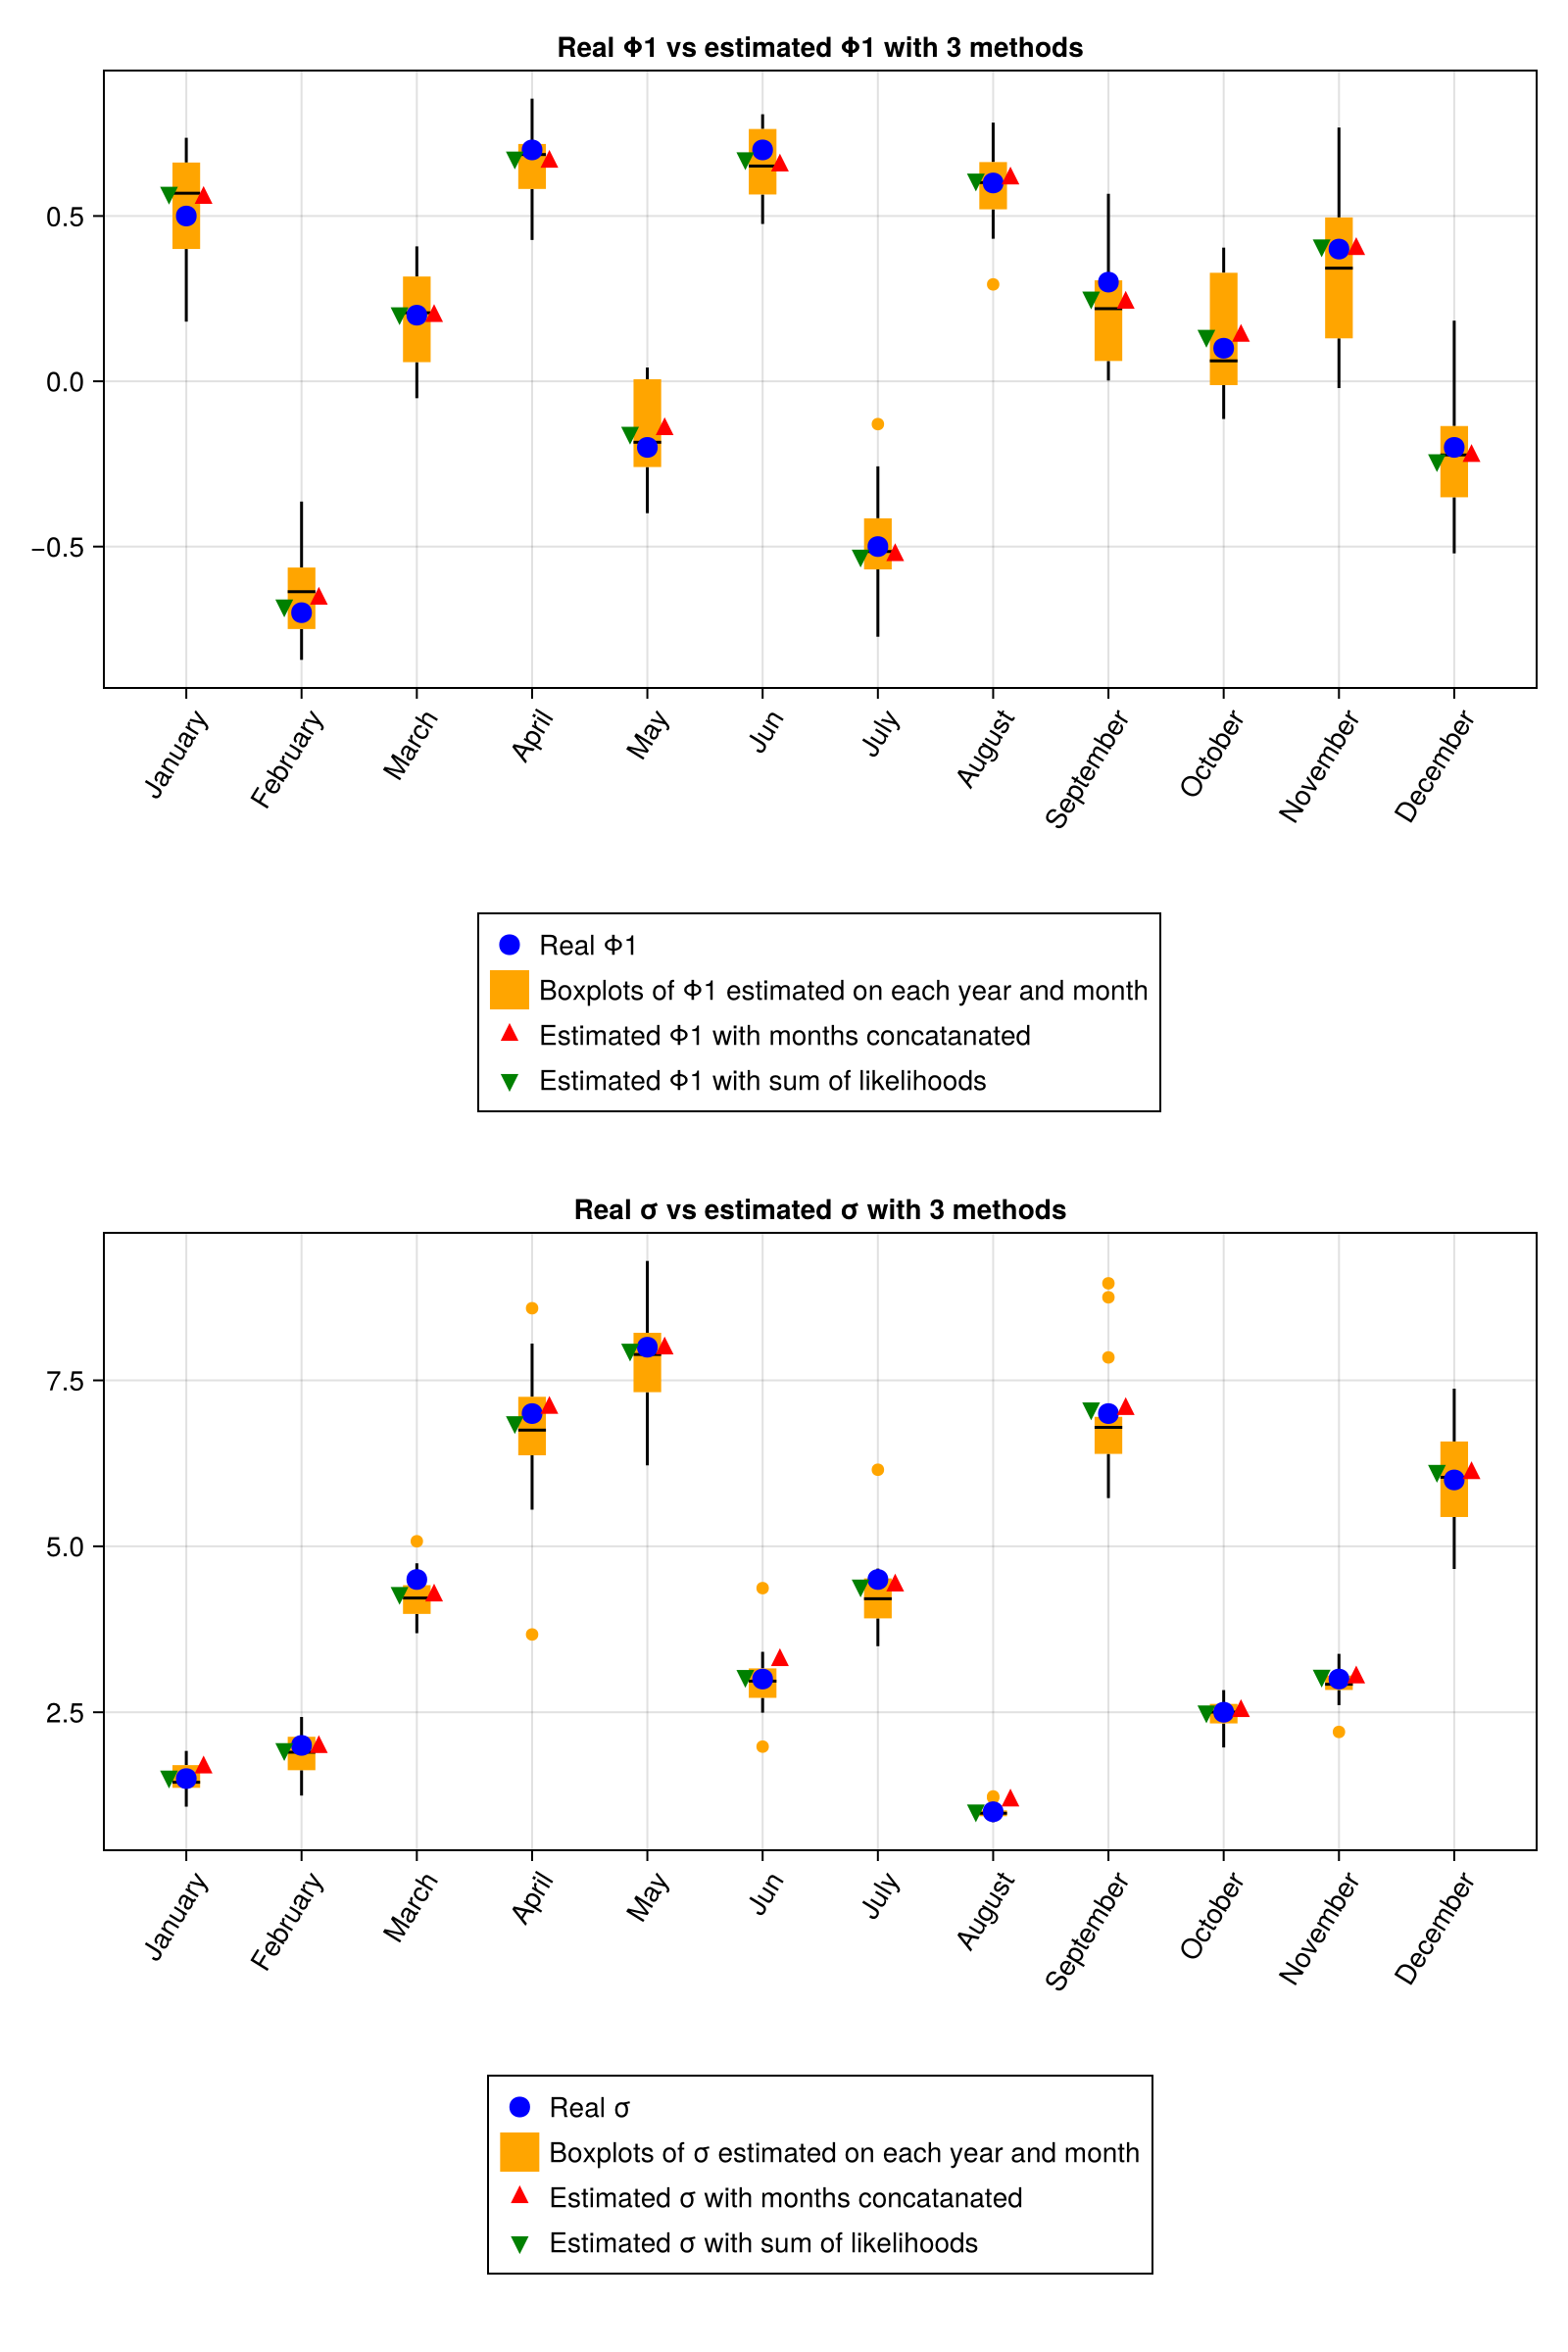

Row,Parameter,Month concatanation,Sum LL,mean of monthly parameters,median of monthly parameters
,String,Float64,Float64,Float64,Float64
1,Φ1,11.3648,10.9595,12.1354,11.4262
2,σ,4.33204,1.90213,2.47927,3.0006


6

In [23]:
include(raw"utils\Estimation.jl")
Parameters,autofig,PercentageErrorTable=AllEstimation(x,1,Date_vec=Date_vec,TrueParamVec=[Φ_month,σ_month])
display(autofig)
display(PercentageErrorTable)

In [24]:
Φ_vec, σ_vec = AutoTakeParameters((Parameters,PercentageErrorTable))
n_years=100
sim=SimulateYears([4.],Date(2001,1,1),Φ_vec, σ_vec,n_years)
sample_=invert(sim)

365-element Vector{Vector{Float64}}:
 [4.0, 5.796686064557315, 3.551679646787859, -3.5003689893389742, -0.7615755957798029, -2.160464372058374, -1.963598896841823, 4.485627799453599, -1.4529601418490026, 5.036745222429685  …  -3.088845122287583, 0.09709523845118101, 2.9990865437685588, 0.26059528523664754, -3.7733317284848034, -3.1450678212867555, -6.358526421983671, -2.6680607399610934, -1.4654395431296785, 1.899444027280711]
 [2.4512822896952593, 3.569855597748541, 3.0512497768858218, 0.102092898421688, -0.024083271247842986, -3.5698140447858586, -0.1719900387222164, 0.28122521433971404, -3.2815284173588104, 3.0673162821337048  …  -1.5648412170077324, -2.2299831470488938, 3.528493738701445, 1.158005881925129, -2.5019513495757653, -2.422003928558857, -2.8343714802775897, 1.1622027534638557, -3.9252179726505423, 1.8024210167733596]
 [4.045502084626257, 2.18255582374151, 0.7661578633517554, 1.2976527039200842, 2.012515974787659, 0.06512665062749878, 0.18475593178128558, -2.4952246560080

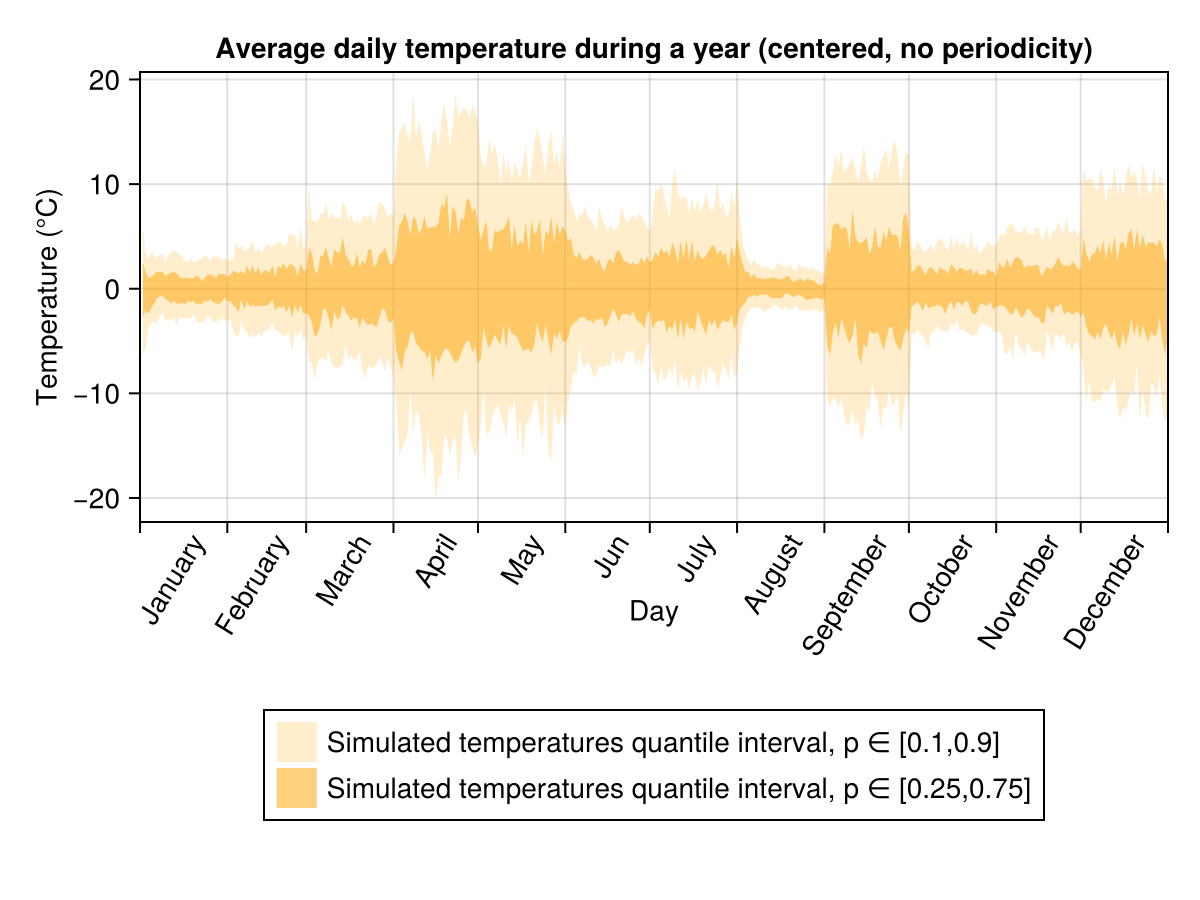

In [25]:
include("utils/Plotting.jl")
PlotYearCurves([],
["Simulated temperatures quantile interval, p ∈ [0.1,0.9]","Simulated temperatures quantile interval, p ∈ [0.25,0.75]"],
"Average daily temperature during a year (centered, no periodicity)",
[(quantile.(sample_,0.05),quantile.(sample_,0.95)),(quantile.(sample_,0.25),quantile.(sample_,0.75))],
[("orange",0.2),("orange",0.5)]
)